In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

Primeiro criaremos alguns dados de teste, dos quais conhecemos a categoria e criaremos um novo ponto, do qual não sabemos seu gênero e visualizaremos todos os pontos.

In [21]:
data = {'Massa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

In [22]:
novo_ponto = {'Massa': [70],
               'Altura': [1.82]}

In [23]:
df = pd.DataFrame(data)
novo_ponto = pd.DataFrame(novo_ponto)

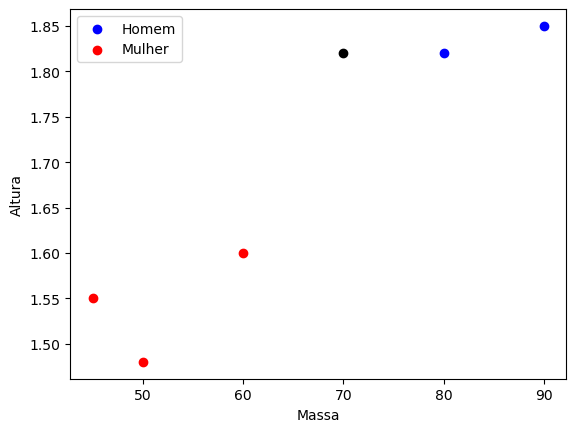

In [25]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Massa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="blue",
           label="Homem")
ax.scatter(df.loc[df['Genero'] == 'm', 'Massa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="red",
           label="Mulher")
ax.scatter(novo_ponto['Massa'],
           novo_ponto['Altura'],
           c="black")
plt.xlabel("Massa")
plt.ylabel("Altura")
ax.legend()
plt.show()

Em seguida, treinamos o algoritmo KNN nos dados para os quais temos rótulos.

In [26]:
X = df[['Massa', 'Altura']]
# sd = StandardScaler()
# sd = sd.fit(X)
# X  = sd.transform(X)
X = StandardScaler().fit_transform(X)
y = df[['Genero']].values[:,0]

In [27]:
X

array([[-0.8660254 , -1.2146645 ],
       [ 0.8660254 ,  1.07970177],
       [ 1.44337567,  1.28214586],
       [-1.15470054, -0.74229497],
       [-0.28867513, -0.40488817]])

In [28]:
y

array(['m', 'h', 'h', 'm', 'm'], dtype=object)

In [30]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn = knn.fit(X, y)
knn = KNeighborsClassifier(n_neighbors=5).fit(X, y)

In [31]:
prediccion = knn.predict(novo_ponto.values)
print(prediccion)

['m']


# Escolhendo o K

 ## k = sqrt(n)

In [32]:
data = {'Massa': [50, 80, 90, 45, 60, 55, 85, 95, 45, 65, 52, 82, 92, 47, 62, 75, 95, 79, 70, 80,98,72,68,65,80,55,56,70,57,82],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60, 1.49, 1.85, 1.88, 1.59, 1.65, 1.50, 1.84, 1.87, 1.57, 1.62, 1.7, 1.8, 1.85, 1.7,1.9,2,1.65,1.69,1.68,1.6,1.61,1.8,1.55,1.81,1.58],
        'Genero': ['m', 'h', 'h', 'm', 'm','m', 'h', 'h', 'm', 'm','m', 'h', 'h', 'm', 'm','m','h','h','h','h','h','m','m','m','h','h','h','m','h','h']}
df = pd.DataFrame(data)

In [33]:
df

,Massa,Altura,Genero
0,50,1.48,m
1,80,1.82,h
2,90,1.85,h
3,45,1.55,m
4,60,1.60,m
5,55,1.49,m
6,85,1.85,h
7,95,1.88,h
8,45,1.59,m
9,65,1.65,m


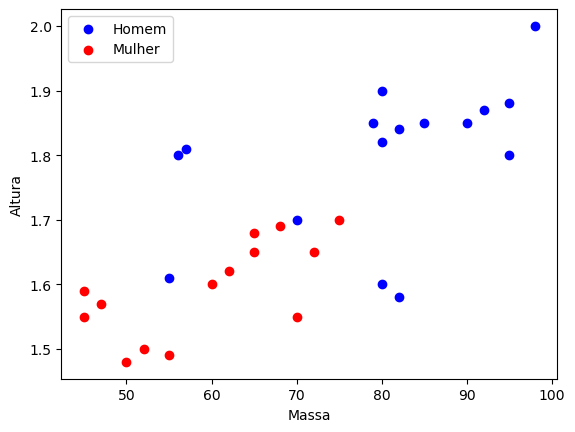

In [35]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Massa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="blue",
           label="Homem")
ax.scatter(df.loc[df['Genero'] == 'm', 'Massa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="red",
           label="Mulher")
plt.xlabel("Massa")
plt.ylabel("Altura")
ax.legend()
plt.show()

In [36]:
X = df.drop(['Genero'], axis = 1)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df[['Genero']].values[:,0]

In [38]:
# Vamos separar em 70/30
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size = 0.30,
                                    random_state = 11)

In [39]:
X_train.shape

(21, 2)

In [14]:
np.sqrt(X_train.shape[0])

4.58257569495584

Text(0, 0.5, 'Acurácia')

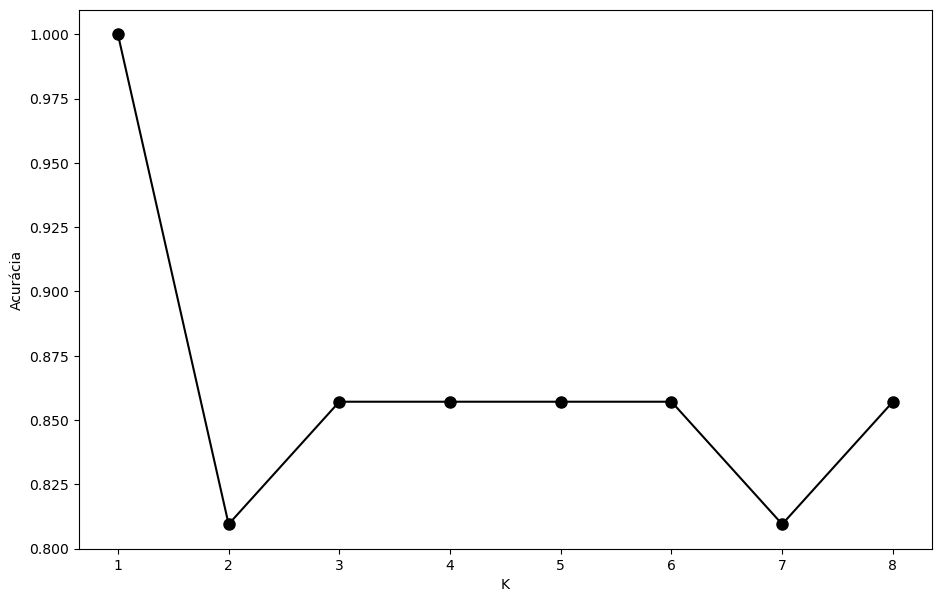

In [40]:
k = 9

error_rate = []
for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_train)
    error_rate.append(accuracy_score(y_train, yhat))

plt.figure(figsize=(11, 7))
plt.plot(range(1,k),error_rate, color = 'black', 
         marker='o', markersize = 8)
plt.xlabel('K')
plt.ylabel('Acurácia')

# O KNN visualmente

In [41]:
y2 = pd.DataFrame({'Genero':y})
y2["Genero"] = y2["Genero"].map({'m':1, 'h':0})

C:\Users\gusta\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


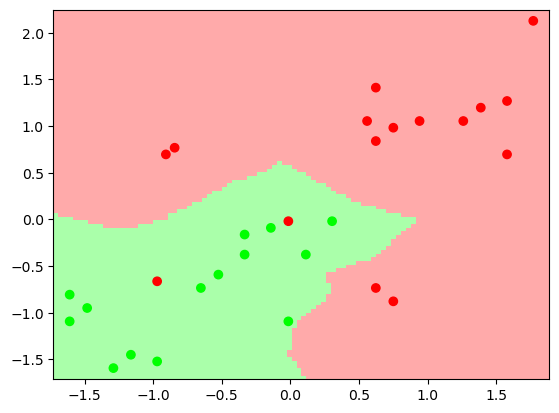

In [42]:
k = 3

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X, y2)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = y2.values, cmap=cmap_bold)

# Knn Final

In [43]:
X = df.drop(['Genero'], axis = 1)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df[['Genero']].values[:,0]

knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [44]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% Acurácia:', train_accuracy, test_accuracy)

% Acurácia: 0.9047619047619048 1.0
